# Color Map of India using the Constraint Satisfaction Problem

A Constraint Satisfaction Problem (CSP) implementation to color the states and union territories of India on a map using GeoPandas, Matplotlib, and Shapely. The project ensures that no two adjacent states share the same color.

In [1]:
class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints
        self.solution = None

    def solve(self):
        assignment = {}
        self.solution = self.backtrack(assignment)
        return self.solution

    def backtrack(self, assignment):
        if len(assignment) == len(self.variables):
            return assignment

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            if self.is_consistent(var, value, assignment):
                assignment[var] = value
                result = self.backtrack(assignment)
                if result is not None:
                    return result
                del assignment[var]
        return None

    def select_unassigned_variable(self, assignment):
        unassigned_vars = [var for var in self.variables if var not in assignment]
        return min(unassigned_vars, key=lambda var: len(self.domains[var]))

    def order_domain_values(self, var, assignment):
        return self.domains[var]

    def is_consistent(self, var, value, assignment):
        for constraint_var in self.constraints[var]:
            if constraint_var in assignment and assignment[constraint_var] == value:
                return False
        return True

In [11]:
# Defining the variables i.e Indian states and Union Territories
variables = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 
             'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
             'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
             'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
             'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Andaman and Nicobar Islands', 
             'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep', 'Delhi', 
             'Puducherry', 'Jammu and Kashmir', 'Ladakh']

# Defining the domains i.e. the colors
domains = {var: ['SkyBlue', 'LightGreen', 'darkorange', 'Lavender'] for var in variables}

# Defining the constraints (adjacency)
constraints = {
    'Andhra Pradesh': ['Tamil Nadu', 'Karnataka', 'Telangana', 'Chhattisgarh', 'Odisha'],
    'Arunachal Pradesh': ['Assam', 'Nagaland'],
    'Assam': ['Arunachal Pradesh', 'West Bengal','Meghalaya','Nagaland', 'Manipur', 'West Bengal','Tripura','Mizoram'],
    'Bihar': ['Uttar Pradesh', 'Jharkhand', 'West Bengal'],
    'Chhattisgarh': ['Madhya Pradesh', 'Odisha', 'Jharkhand', 'Maharashtra','Uttar Pradesh','Andhra Pradesh'],
    'Goa': ['Maharashtra', 'Karnataka'],
    'Gujarat': ['Maharashtra', 'Rajasthan'],
    'Haryana': ['Punjab', 'Uttar Pradesh', 'Rajasthan','Uttarakhand'],
    'Himachal Pradesh': ['Punjab', 'Uttarakhand', 'Haryana'],
    'Jharkhand': ['Bihar', 'Odisha', 'Chhattisgarh', 'West Bengal','Uttar Pradesh'],
    'Karnataka': ['Maharashtra', 'Goa', 'Andhra Pradesh', 'Telangana' 'Tamil Nadu'],
    'Kerala': ['Tamil Nadu', 'Karnataka'],
    'Madhya Pradesh': ['Maharashtra', 'Gujarat', 'Chhattisgarh', 'Uttar Pradesh'],
    'Maharashtra': ['Gujarat', 'Madhya Pradesh', 'Goa', 'Karnataka','Chhattisgarh'],
    'Manipur': ['Assam', 'Nagaland'],
    'Meghalaya': ['Assam', 'Nagaland'],
    'Mizoram': ['Manipur', 'Tripura','Assam'],
    'Nagaland': ['Manipur', 'Assam', 'Arunachal Pradesh'],
    'Odisha': ['West Bengal', 'Chhattisgarh', 'Jharkhand', 'Andhra Pradesh'],
    'Punjab': ['Haryana', 'Himachal Pradesh', 'Uttar Pradesh','Rajasthan'],
    'Rajasthan': ['Gujarat', 'Madhya Pradesh', 'Haryana','Uttar Pradesh','Punjab'],
    'Sikkim': ['West Bengal'],
    'Tamil Nadu': ['Karnataka', 'Andhra Pradesh', 'Kerala'],
    'Telangana': ['Maharashtra', 'Andhra Pradesh', 'Chhattisgarh','Karnataka'],
    'Tripura': ['Assam', 'Mizoram'],
    'Uttar Pradesh': ['Bihar', 'Madhya Pradesh', 'Haryana', 'Delhi', 'Uttarakhand','Rajasthan','Chhattisgarh','Jharkhand'],
    'Uttarakhand': ['Himachal Pradesh', 'Uttar Pradesh','Haryana'],
    'West Bengal': ['Assam', 'Bihar', 'Sikkim', 'Jharkhand','Odisha'],
    'Andaman and Nicobar Islands': [],
    'Chandigarh': ['Punjab', 'Haryana'],
    'Dadra and Nagar Haveli and Daman and Diu': ['Gujarat'],
    'Lakshadweep': [],
    'Delhi': ['Uttar Pradesh', 'Haryana', 'Rajasthan'],
    'Puducherry': ['Tamil Nadu'],
    'Jammu and Kashmir': ['Himachal Pradesh', 'Punjab', 'Haryana'],
    'Ladakh':['Jammu and Kashmir', 'Himachal Pradesh']
}

In [12]:
# Creating the CSP instance using the initialized variables
csp = CSP(variables, domains, constraints)

# Solving the problem by calling the solve function 
solution = csp.solve()

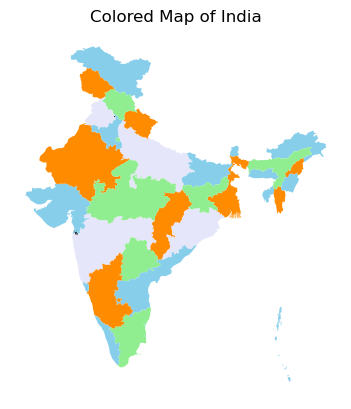

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# Loading the map of India
gdf = gpd.read_file('geoBoundaries-IND-ADM1.geojson')

# Preparing a color mapping based on the solution
color_mapping = {}
if solution:
    for region, color in solution.items():
        color_mapping[region] = color
        
color_list = []
for state in gdf['shapeName']: 
    color_list.append(color_mapping.get(state, 'black'))  # Default color for unmapped regions

gdf.plot(color=color_list)
plt.title('Colored Map of India')
plt.axis('off')
plt.show()

In [14]:
import folium

# Creating a folium map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add colored states to the folium map
for idx, row in gdf.iterrows():
    state_name = row['shapeName']
    state_color = color_mapping.get(state_name, 'black')  # Default to black if not found
    geo_json = mapping(row['geometry'])
    
    # Adding state to the map with popup and color
    folium.GeoJson(
        geo_json,
        style_function=lambda x, color=state_color: {
            'fillColor': color,
            'color': 'black',
            'weight': 1.5,
            'fillOpacity': 0.7
        },
        tooltip=state_name
    ).add_to(m)

m.save("colored_map_of_india.html")
print("Map saved as 'colored_map_of_india.html'.")

Map saved as 'colored_map_of_india.html'.
